In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Synthetic Dataset creation

In [4]:
# Create a synthetic dataset
from sklearn.datasets import make_classification

In [42]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [43]:
X.shape, y.shape

((1000, 2), (1000,))

<Axes: xlabel='0', ylabel='1'>

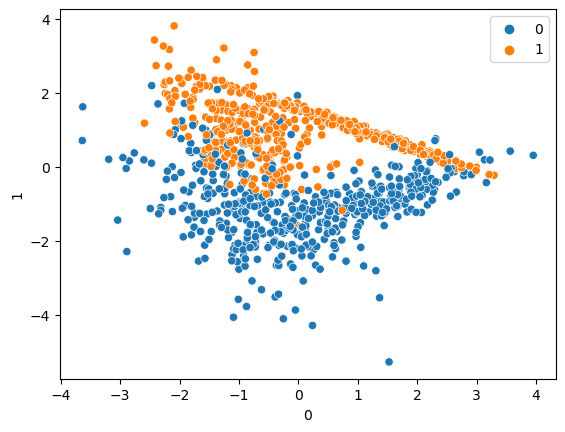

In [44]:
# Plotting using seaborn
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Linear SVC

In [47]:
from sklearn.svm import SVC

In [48]:
svc = SVC(kernel='linear')

In [49]:
# Fitting the model
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
# Prediction
y_pred = svc.predict(X_test)

## Calculating Errors

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [53]:
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       123
           1       0.87      0.87      0.87       127

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



In [54]:
cm

array([[106,  17],
       [ 17, 110]], dtype=int64)

#### Accurcy is 86 %, most probably because we ar fitting a non-linear dataset to a linear SVC

# Hyperparameter Tuning - Trying out other kernels

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
model = SVC()

In [66]:
C = [0.1, 1, 10, 100, 1000]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

param_grid = {'C' : C,
             'kernel' : kernel,
             'gamma' : gamma}

In [71]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, refit=True, n_jobs=-1)

In [72]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [74]:
y_pred = grid.predict(X_test)

## Best Parameters and Score

In [75]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [76]:
grid.best_score_

0.924

## Calculating Errors

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [79]:
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       123
           1       0.89      0.92      0.91       127

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [80]:
cm

array([[109,  14],
       [ 10, 117]], dtype=int64)

#### Accurcy has improved to 90 % after using RBF Kernel for data transformation